In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter
from nltk.corpus import stopwords
#from sklearn.feature_extraction.text import CountVectorizer
#import gensim
#from gensim import corpora
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk import ngrams

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nadianesib/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [9]:
# download required NLTK datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nadianesib/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nadianesib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data cleaning

In [313]:
# data uploading
data = pd.read_csv('/Users/nadianesib/Desktop/Data/raw_analyst_ratings.csv')

In [314]:
# explore the data

In [315]:
data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [319]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


In [321]:
data.shape #columns and rows of the data

(1407328, 6)

In [323]:
data.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

Handle missing data

In [326]:
# identify missing value
data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [328]:
data = data.drop('Unnamed: 0', axis=1) #deleting unnecessary columns

In [334]:
data['date'] = pd.to_datetime(data['date'], format='mixed', utc=True)

In [332]:
data.dtypes

headline                  object
url                       object
publisher                 object
date         datetime64[ns, UTC]
stock                     object
dtype: object

In [249]:
data.drop_duplicates()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A
...,...,...,...,...,...
1407323,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX
1407324,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX
1407325,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX
1407326,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX


# Descriptive anaalysis

In [252]:
#used to summarize and describe the basic features of a dataset

In [254]:
# explore data distribution

In [256]:
data.describe()

,headline,url,publisher,date,stock
count,1407328,1407328,1407328,1407328,1407328
unique,845770,883429,1034,NaN,6204
top,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,NaN,MRK
freq,5449,1704,228373,NaN,3333
mean,NaN,NaN,NaN,2015-08-22 01:54:11.875360256+00:00,NaN
min,NaN,NaN,NaN,2009-02-14 00:00:00+00:00,NaN
25%,NaN,NaN,NaN,2013-01-16 00:00:00+00:00,NaN
50%,NaN,NaN,NaN,2015-09-23 00:00:00+00:00,NaN
75%,NaN,NaN,NaN,2018-05-21 00:00:00+00:00,NaN
max,NaN,NaN,NaN,2020-06-11 21:12:35+00:00,NaN


In [257]:
# Frequency counts for a categorical column or counts per column
data['headline'].value_counts()

headline
Benzinga's Top Upgrades                                                                                                                 5449
Benzinga's Top Downgrades                                                                                                               5372
Benzinga's Top Initiations                                                                                                              4241
Stocks That Hit 52-Week Lows On Thursday                                                                                                3962
Morning Market Losers                                                                                                                   3440
                                                                                                                                        ... 
FireEye Option Alert: Oct 18 $14 Calls at the Ask: 500 @ $0.641 vs 30793 OI; Earnings 10/29 After Close [est] Ref=$13.8                    1
Fire

In [260]:
data['date'].value_counts()

date
2020-03-12 00:00:00+00:00    1766
2020-02-27 00:00:00+00:00    1292
2020-02-28 00:00:00+00:00    1239
2019-08-01 00:00:00+00:00    1228
2020-03-06 00:00:00+00:00    1147
                             ... 
2016-05-27 18:31:02+00:00       1
2016-05-31 00:24:29+00:00       1
2016-05-31 08:40:26+00:00       1
2016-05-31 10:12:15+00:00       1
2017-11-14 17:25:57+00:00       1
Name: count, Length: 39956, dtype: int64

In [262]:
# Frequency counts for a categorical column
data['publisher'].value_counts()

publisher
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: count, Length: 1034, dtype: int64

In [264]:
# Frequency counts for a categorical column
data['url'].value_counts()

url
https://www.benzinga.com/news/20/03/15538835/stocks-that-hit-52-week-lows-on-thursday                                            1704
https://www.benzinga.com/news/20/03/15607641/stocks-that-hit-52-week-lows-on-thursday                                             754
https://www.benzinga.com/news/20/02/15441854/stocks-that-hit-52-week-lows-on-friday                                               714
https://www.benzinga.com/news/20/03/15498904/stocks-that-hit-52-week-lows-on-friday                                               624
https://www.benzinga.com/news/20/02/15429529/stocks-that-hit-52-week-lows-on-thursday                                             562
                                                                                                                                 ... 
https://www.benzinga.com/news/earnings/14/07/4694703/frequency-electronics-inc-reports-q4-eps-of-0-09-which-may-not-compare-0       1
https://www.benzinga.com/news/14/06/4663503/frequency-elec

In [265]:
data.mode() #The most frequent value in the dataset.

,headline,url,publisher,date,stock
0,Benzinga's Top Upgrades,https://www.benzinga.com/news/20/03/15538835/s...,Paul Quintaro,2020-03-12 00:00:00+00:00,MRK


In [267]:
#calculate text length
# Calculate the length of each headline
data['headline'] = data['headline'].str.len()

In [269]:
data.headline

0          39
1          42
2          29
3          44
4          87
           ..
1407323    38
1407324    52
1407325    56
1407326    54
1407327    81
Name: headline, Length: 1407328, dtype: int64

In [272]:
# Basic descriptive statistics for headline lengths
headline_stats = data['headline'].describe()

In [274]:
data.headline.describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline, dtype: float64

In [276]:
median_length = data['headline'].median() # middle value of lengths
print("Median Length:", median_length)

Median Length: 64.0


In [278]:
mode_length = data['headline'].mode()[0] # most frequent lengths
print("Mode Length:", mode_length)

Mode Length: 47


In [280]:
variance_length = data['headline'].var() # variance of headline lengths
print("Variance Length:", variance_length)

Variance Length: 1659.3654752503999


In [282]:
std_dev_length = data['headline'].std() # standard deviation of headline lengths
print("Standard Deviation Length:", std_dev_length)

Standard Deviation Length: 40.73530993193006


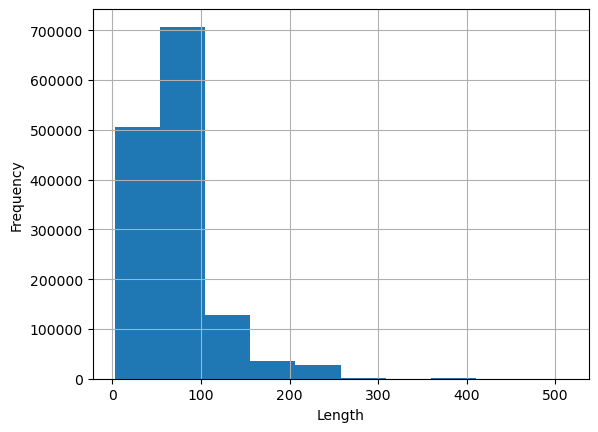

In [284]:
data['headline'].hist(bins=10) #shows the frequency distribution of headline lengths
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()


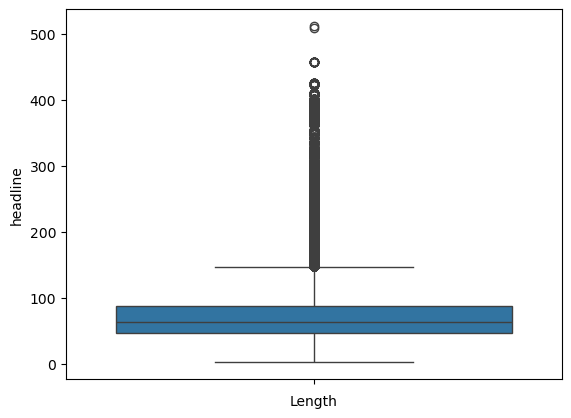

In [286]:
sns.boxplot(data['headline']) #displays the distribution and highlights any outliers
plt.xlabel('Length')
plt.show()


In [287]:
# trends over time daily
# count articles per day
daily_counts = data['date'].value_counts().sort_index()
daily_counts.head(50)

date
2009-02-14 00:00:00+00:00       1
2009-04-27 00:00:00+00:00       2
2009-04-29 00:00:00+00:00       1
2009-05-22 00:00:00+00:00       1
2009-05-27 00:00:00+00:00       6
2009-05-29 00:00:00+00:00       2
2009-05-30 00:00:00+00:00       3
2009-06-01 00:00:00+00:00       5
2009-06-02 00:00:00+00:00       2
2009-06-05 00:00:00+00:00       6
2009-06-08 00:00:00+00:00       3
2009-06-09 00:00:00+00:00       7
2009-06-15 00:00:00+00:00       3
2009-06-16 00:00:00+00:00       3
2009-06-19 00:00:00+00:00       5
2009-06-22 00:00:00+00:00       1
2009-06-28 00:00:00+00:00       2
2009-06-30 00:00:00+00:00       3
2009-07-07 00:00:00+00:00       2
2009-07-08 00:00:00+00:00       2
2009-07-10 00:00:00+00:00       1
2009-07-14 00:00:00+00:00       3
2009-07-15 00:00:00+00:00       2
2009-07-16 00:00:00+00:00       1
2009-07-17 00:00:00+00:00       1
2009-07-21 00:00:00+00:00       7
2009-07-24 00:00:00+00:00       1
2009-07-27 00:00:00+00:00      54
2009-07-30 00:00:00+00:00       1
2009-08-0

In [288]:
daily_counts.max()

1766

In [289]:
daily_counts.min()

1

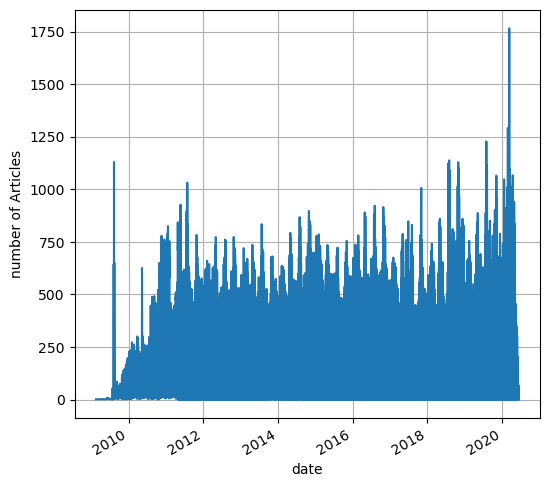

In [294]:
# Plot daily publication counts
plt.figure(figsize=(6, 6))
daily_counts.plot(kind='line')
plt.xlabel('date')
plt.ylabel('number of Articles')
plt.grid(True)
plt.show()


In [296]:
data['publication_date'] = pd.to_datetime(data['date']) #this will make sure that date column as the index of Dataset.
data.set_index('date', inplace=True)

In [298]:
#per week
weekly_counts = data.resample('W').size()
weekly_counts.head(50)

date
2009-02-15 00:00:00+00:00       1
2009-02-22 00:00:00+00:00       0
2009-03-01 00:00:00+00:00       0
2009-03-08 00:00:00+00:00       0
2009-03-15 00:00:00+00:00       0
2009-03-22 00:00:00+00:00       0
2009-03-29 00:00:00+00:00       0
2009-04-05 00:00:00+00:00       0
2009-04-12 00:00:00+00:00       0
2009-04-19 00:00:00+00:00       0
2009-04-26 00:00:00+00:00       0
2009-05-03 00:00:00+00:00       3
2009-05-10 00:00:00+00:00       0
2009-05-17 00:00:00+00:00       0
2009-05-24 00:00:00+00:00       1
2009-05-31 00:00:00+00:00      11
2009-06-07 00:00:00+00:00      13
2009-06-14 00:00:00+00:00      10
2009-06-21 00:00:00+00:00      11
2009-06-28 00:00:00+00:00       3
2009-07-05 00:00:00+00:00       3
2009-07-12 00:00:00+00:00       5
2009-07-19 00:00:00+00:00       7
2009-07-26 00:00:00+00:00       8
2009-08-02 00:00:00+00:00      56
2009-08-09 00:00:00+00:00     743
2009-08-16 00:00:00+00:00    2466
2009-08-23 00:00:00+00:00     184
2009-08-30 00:00:00+00:00     199
2009-09-0

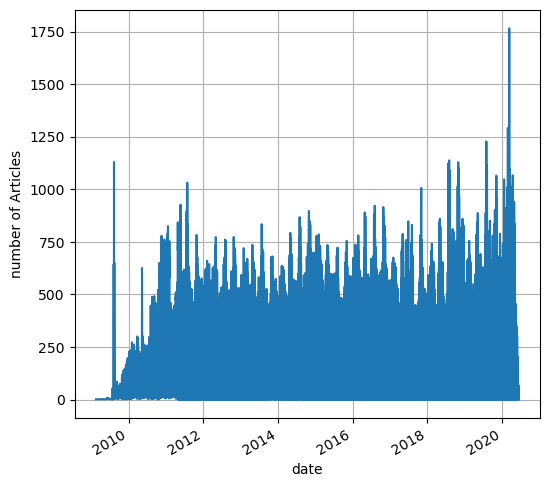

In [299]:
# Plot weekly publication counts
plt.figure(figsize=(6, 6))
daily_counts.plot(kind='line')
plt.xlabel('date')
plt.ylabel('number of Articles')
plt.grid(True)
plt.show()

In [301]:
#per month
monthly_counts = data.resample('M').size()
monthly_counts.head(50)

/var/folders/v_/hr6j_dwj5dq5tjppg8dm5xt80000gn/T/ipykernel_37856/2966946573.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_counts = data.resample('M').size()


date
2009-02-28 00:00:00+00:00        1
2009-03-31 00:00:00+00:00        0
2009-04-30 00:00:00+00:00        3
2009-05-31 00:00:00+00:00       12
2009-06-30 00:00:00+00:00       40
2009-07-31 00:00:00+00:00       75
2009-08-31 00:00:00+00:00     3633
2009-09-30 00:00:00+00:00     1023
2009-10-31 00:00:00+00:00     1330
2009-11-30 00:00:00+00:00     2262
2009-12-31 00:00:00+00:00     3110
2010-01-31 00:00:00+00:00     3807
2010-02-28 00:00:00+00:00     4130
2010-03-31 00:00:00+00:00     4739
2010-04-30 00:00:00+00:00     4007
2010-05-31 00:00:00+00:00     5098
2010-06-30 00:00:00+00:00     4707
2010-07-31 00:00:00+00:00     4958
2010-08-31 00:00:00+00:00     7481
2010-09-30 00:00:00+00:00     8098
2010-10-31 00:00:00+00:00     8581
2010-11-30 00:00:00+00:00    11516
2010-12-31 00:00:00+00:00    14197
2011-01-31 00:00:00+00:00    14307
2011-02-28 00:00:00+00:00     8250
2011-03-31 00:00:00+00:00     8901
2011-04-30 00:00:00+00:00    10583
2011-05-31 00:00:00+00:00    12275
2011-06-30 00:0

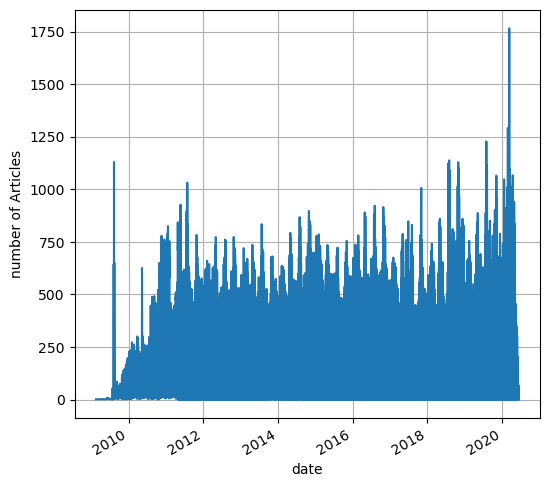

In [303]:
# Plot monthly publication counts
plt.figure(figsize=(6, 6))
daily_counts.plot(kind='line')
plt.xlabel('date')
plt.ylabel('number of Articles')
plt.grid(True)
plt.show()

# Text Analysis(Sentiment analysis & Topic Modeling)

In [502]:
#Perform sentiment analysis on headlines

In [504]:
# sentiment analysis:- we use vader here that provides compound score(normalized value that comprehend sentiments)

In [506]:
sia = SentimentIntensityAnalyzer() #initialize the SIA

In [508]:
# Function to classify sentiment
def get_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [510]:
# Convert all headlines to strings
data['headline'] = data['headline'].astype(str)

In [512]:
data['sentiment_score'] = data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
data['sentiment'] = data['sentiment_score'].apply(get_sentiment)

In [514]:
data

,headline,url,publisher,date,stock,Hour,tokens,sentiment_score,sentiment
0,stocks that hit 52-week highs on friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,14,"[stocks, hit, highs, friday]",0.0000,Neutral
1,stocks that hit 52-week highs on wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,14,"[stocks, hit, highs, wednesday]",0.0000,Neutral
2,71 biggest movers from friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,8,"[biggest, movers, friday]",0.0000,Neutral
3,46 stocks moving in friday's mid-day session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,16,"[stocks, moving, friday, session]",0.0000,Neutral
4,b of a securities maintains neutral on agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,15,"[b, securities, maintains, neutral, agilent, t...",0.2960,Positive
...,...,...,...,...,...,...,...,...,...
1407323,top narrow based indexes for august 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00+00:00,ZX,0,"[top, narrow, based, indexes, august]",0.2023,Positive
1407324,recap: wednesday's top percentage gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00+00:00,ZX,0,"[recap, wednesday, top, percentage, gainers, l...",-0.3818,Negative
1407325,update: oppenheimer color on china zenix auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00+00:00,ZX,0,"[update, oppenheimer, color, china, zenix, aut...",0.0000,Neutral
1407326,oppenheimer initiates china zenix at outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00+00:00,ZX,0,"[oppenheimer, initiates, china, zenix, outperf...",0.0000,Neutral


In [516]:
#NLP for to identify common keywords.

In [518]:
#Preprocess the Headlines
# this convert headlines to lowercase, tokenize, and remove stopwords:

In [519]:
# Convert headlines to lowercase
data['headline'] = data['headline'].str.lower()

In [520]:
# Tokenize headlines
data['tokens'] = data['headline'].apply(word_tokenize)

In [521]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
data['tokens'] = data['tokens'].apply(lambda x: [word for word in x if word.isalpha() and word not in stop_words])

In [522]:
 #Display the DataFrame with tokens
print(data[['headline', 'tokens']])

                                                  headline  \
0                  stocks that hit 52-week highs on friday   
1               stocks that hit 52-week highs on wednesday   
2                            71 biggest movers from friday   
3             46 stocks moving in friday's mid-day session   
4        b of a securities maintains neutral on agilent...   
...                                                    ...   
1407323             top narrow based indexes for august 29   
1407324  recap: wednesday's top percentage gainers and ...   
1407325  update: oppenheimer color on china zenix auto ...   
1407326  oppenheimer initiates china zenix at outperfor...   
1407327  china zenix auto international opens for tradi...   

                                                    tokens  
0                             [stocks, hit, highs, friday]  
1                          [stocks, hit, highs, wednesday]  
2                                [biggest, movers, friday]  
3          

In [523]:
#Identify Common Keywords
#Use word frequency to find the most common words in the headlines:

In [524]:
# Flatten the list of tokens to count word frequency
all_words = [word for tokens in data['tokens'] for word in tokens]
word_freq = Counter(all_words)

In [525]:
# Display the most common keywords
common_keywords = word_freq.most_common(10)
print(common_keywords)

[('stocks', 161702), ('vs', 138835), ('eps', 128801), ('est', 122289), ('shares', 114140), ('reports', 108688), ('update', 91645), ('market', 91080), ('earnings', 87183), ('sales', 79528)]


In [526]:
#Extract Common Phrases (Bigrams)
#Use bigrams to identify common two-word phrases:

In [527]:
# Generate bigrams (2-word phrases)
bigrams = [bigram for tokens in data['tokens'] for bigram in ngrams(tokens, 2)]

In [ ]:
# Count frequency of bigrams
bigram_freq = Counter(bigrams)


In [ ]:
common_bigrams = bigram_freq.most_common(10)
print(common_bigrams)

In [ ]:
# Generate trigrams (3-word phrases)
trigrams = [trigram for tokens in data['tokens'] for trigram in ngrams(tokens, 3)]

In [ ]:
# Count frequency of trigrams
trigram_freq = Counter(trigrams)

In [ ]:
common_trigrams = trigram_freq.most_common(10)
print(common_trigrams)

# Time Series Analysis:

In [357]:
data['date'] = pd.to_datetime(data['date'])

In [373]:
# Resample based on the correct timestamp column
publication_counts = data.resample('D', on='date').count()['headline']

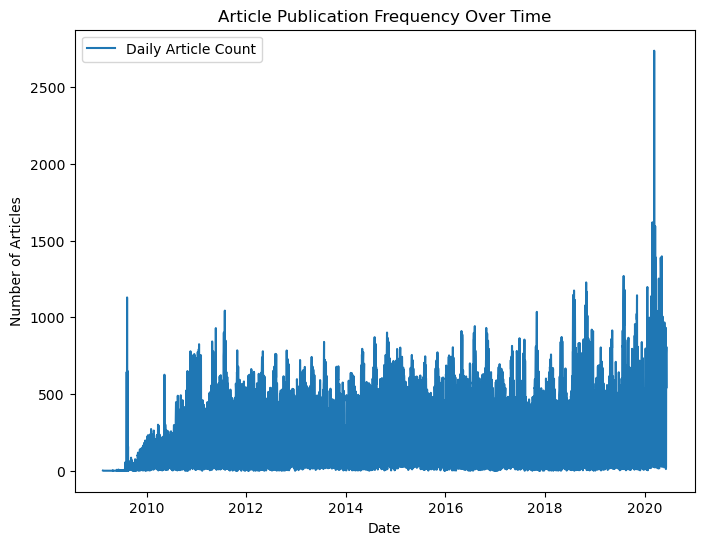

In [378]:
# Plot the publication frequency over time
plt.figure(figsize=(8, 6))
plt.plot(publication_counts, label='Daily Article Count')
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend()
plt.show()

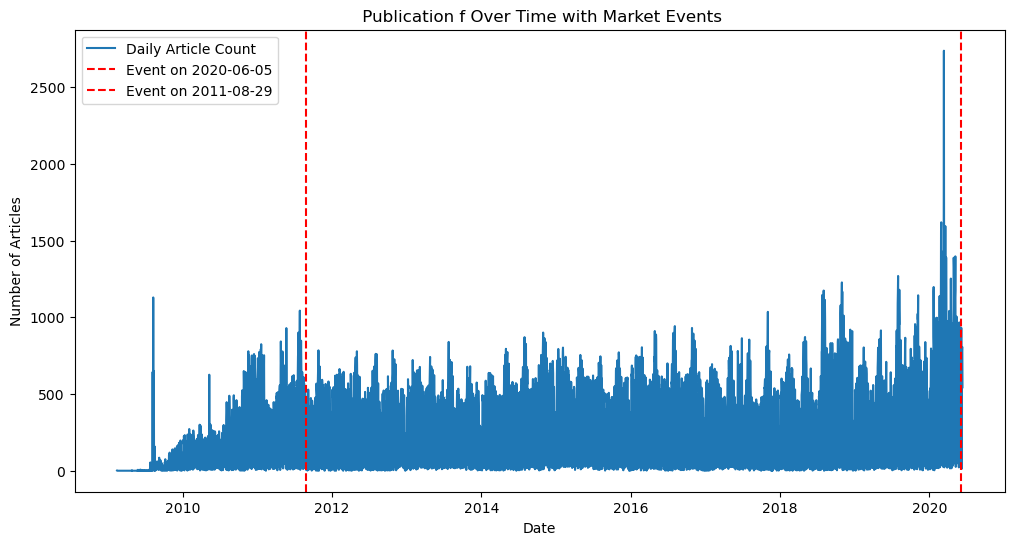

In [388]:
event_dates = pd.to_datetime(['2020-06-05', '2011-08-29'])  # Add actual dates

# Overlay events on the plot
plt.figure(figsize=(12, 6))
plt.plot(publication_counts, label='Daily Article Count')
for event_date in event_dates:
    plt.axvline(event_date, color='red', linestyle='--', label=f'Event on {event_date.date()}')
plt.title(' Publication f Over Time with Market Events')
plt.xlabel('date')
plt.ylabel('number of Articles')
plt.legend()
plt.show()


In [ ]:
#Analysis of publishing times

In [393]:
data['date'] = pd.to_datetime(data['date'])

In [397]:
# Extract the hour from the timestamp
data['Hour'] = data['date'].dt.hour

In [399]:
# Count the number of articles published at each hour
hourly_counts = data['Hour'].value_counts().sort_index()

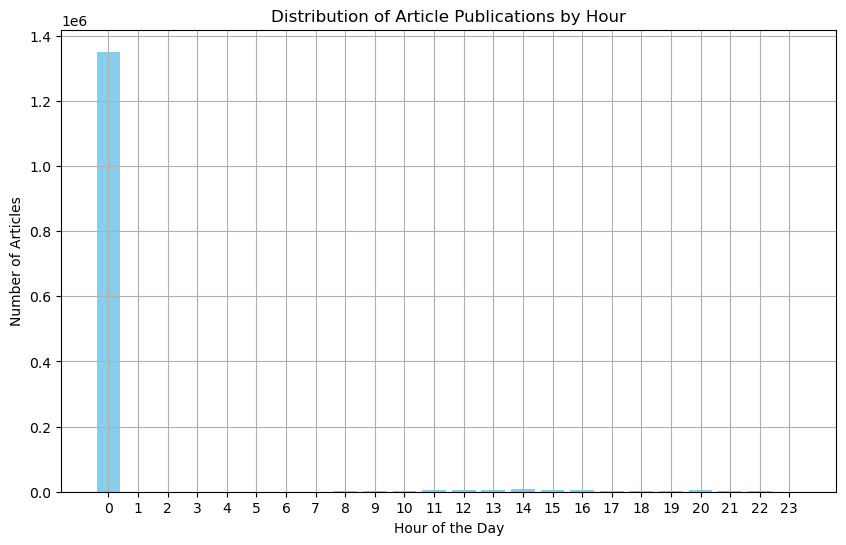

In [401]:
# Plot the distribution of article publications by hour
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
plt.title('Distribution of Article Publications by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Articles')
plt.xticks(range(0, 24))  # Ensuring all hours are labeled on the x-axis
plt.grid(True)
plt.show()

# Publisher Analysis:

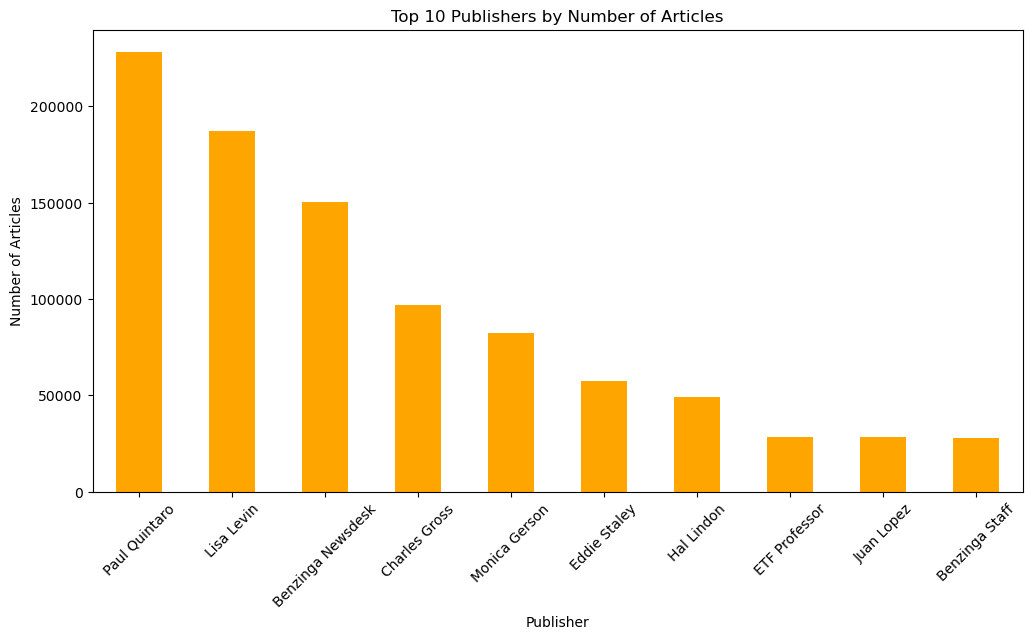

In [403]:
# Assuming your data has a 'Publisher' column
publisher_counts = data['publisher'].value_counts()

# Plot the top publishers by number of articles
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.show()

In [423]:
# Assuming your data has 'Publisher' and 'Category' columns
content_by_publisher = data.groupby(['Publisher', 'Category']).size().unstack(fill_value=0)

# Normalize by the total number of articles per publisher to compare proportions
content_by_publisher_norm = content_by_publisher.div(content_by_publisher.sum(axis=1), axis=0)

# Plotting the distribution for the top publishers
top_publishers = content_by_publisher_norm.sum(axis=1).nlargest(5).index  # Adjust as needed

content_by_publisher_norm.loc[top_publishers].plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribution of Article Types by Top Publishers')
plt.xlabel('Publisher')
plt.ylabel('Proportion of Articles')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()
